In [1]:
data = read.csv("finanziamenti.csv", sep=";", dec=",")
data [1:5,]

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
,<int>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,4,5,Compet. per le imprese,18,TECNOLOGIE INFORMATICHE,ASSISI,22356.25,22356.25,83037.5
2,38,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,99750.00,99750.00,370500.0
3,39,11,Agenda digitale,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,3802.90,3802.90,18423.2
4,43,4,Ricerca e innovazione,18,TECNOLOGIE INFORMATICHE,ASSISI,193020.00,193020.00,474360.0
5,73,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' INDUSTRIALI E L'ARTIGIANATO",ASSISI,10688.70,10688.70,NA


1. Il carattere CodiceCategoria è nominale, ordinale o scalare? Giustificate la risposta.
        è nominale pur essendo codificato come un intero in quando rappresenta una categoria.

2. Calcolate la tabella delle frequenze assolute del carattere UNITA.

In [2]:
table(data$UNITA)


              ASSISI               CASCIA    CASTIGLIONE DEL L 
                 243                   13                   75 
              CHIUSI    CITTA DI CASTELLO              CORTONA 
                  30                  288                    1 
             FOLIGNO        GUALDO TADINO               GUBBIO 
                 449                   75                   76 
              NORCIA              ORVIETO              PERUGIA 
                  28                   60                 1005 
        SLL MULTIPLO SLL NON ATTRIBUIBILE              SPOLETO 
                   5                  255                  186 
               TERNI                 TODI            UMBERTIDE 
                 638                  117                  124 

3. Tracciate un grafico opportuno per descrivere il carattere UNITA.

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



numeric(0)

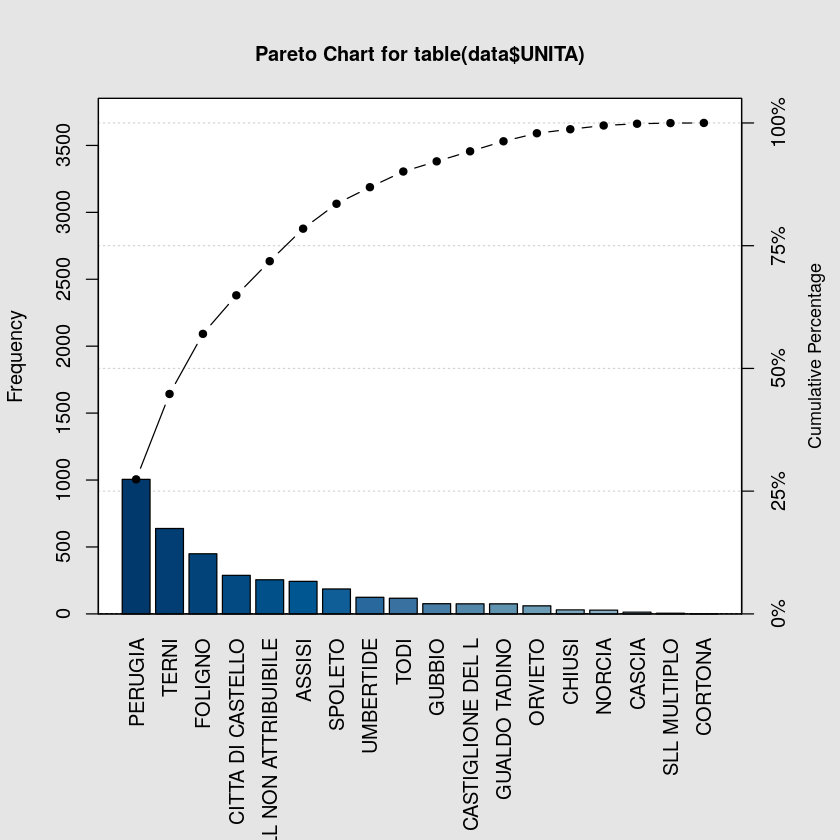

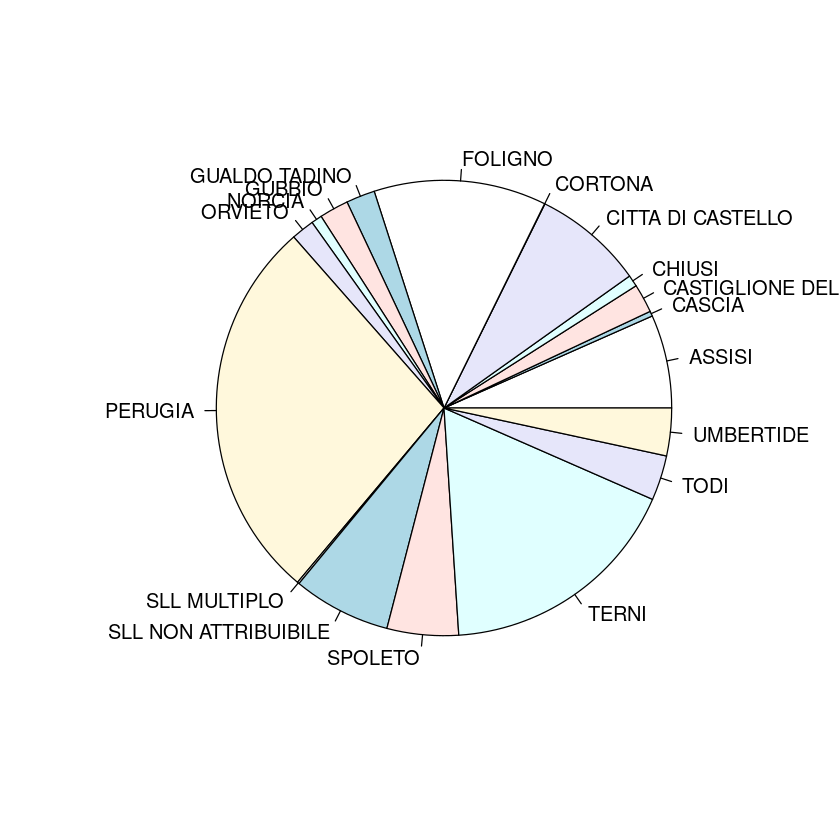

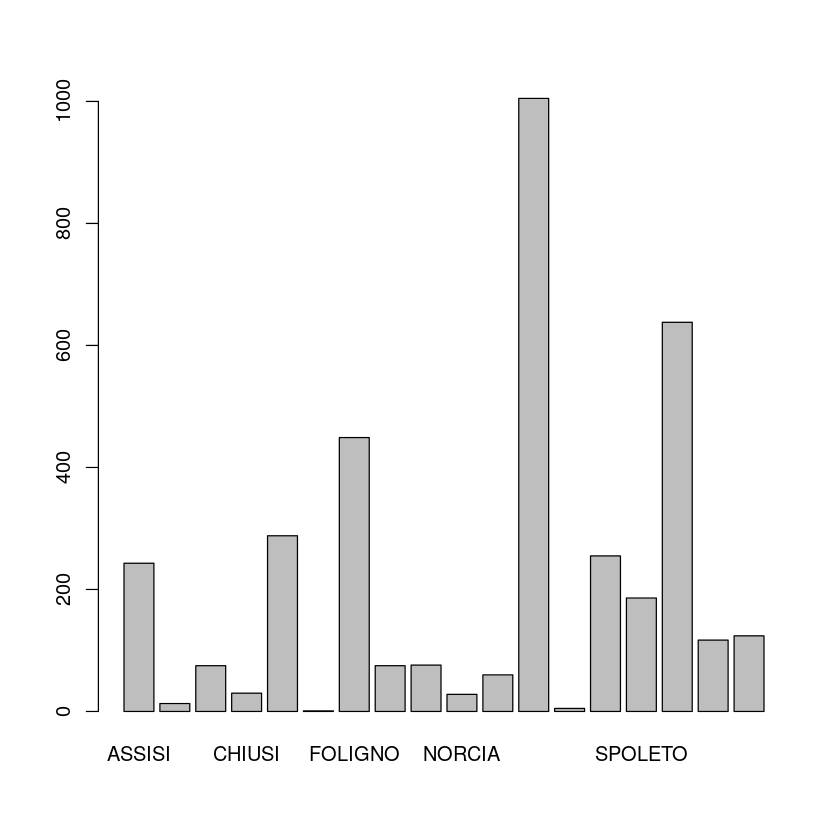

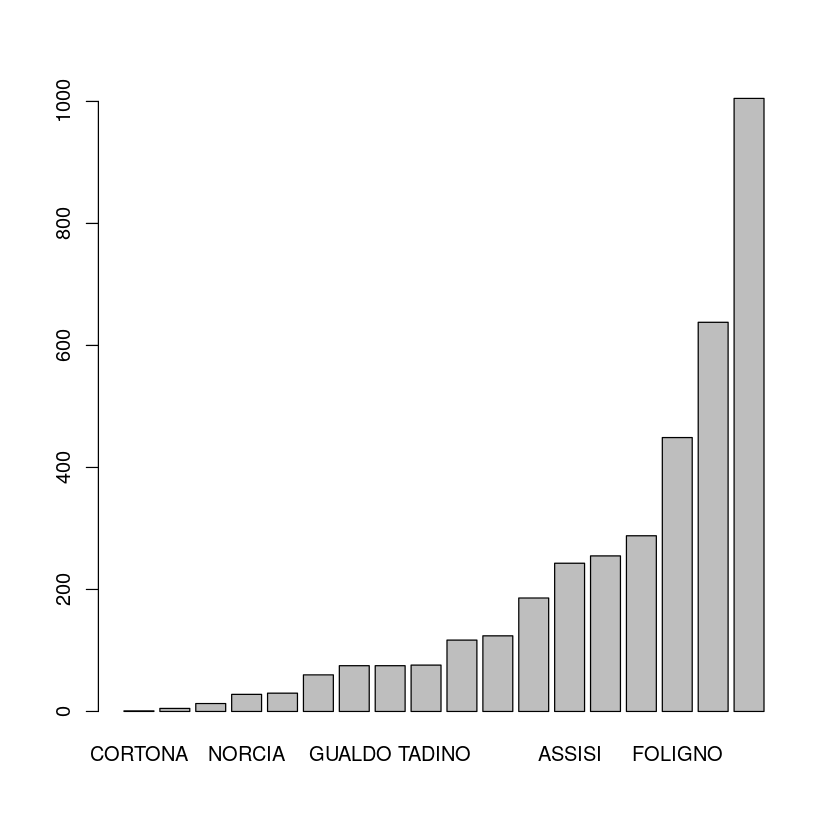

In [3]:
library(qcc)
pareto.chart(table(data$UNITA))[0]
#oppure
    pie(table(data$UNITA))
#oppure (ma meno efficace dlle precedenti)
    barplot(table(data$UNITA))
    barplot(sort(table(data$UNITA)))


4. La Figura 1 mostra la funzione di ripartizione empirica per un sotto-insieme delle osservazioni relativi al carattere TotSpese, in cui gli importi sono indicati in centinaia dimigliaia di Euro. Leggendo esclusivamente il grafico:  
    4.1. indicate quale sottoinsieme di osservazioni è stato utilizzato;

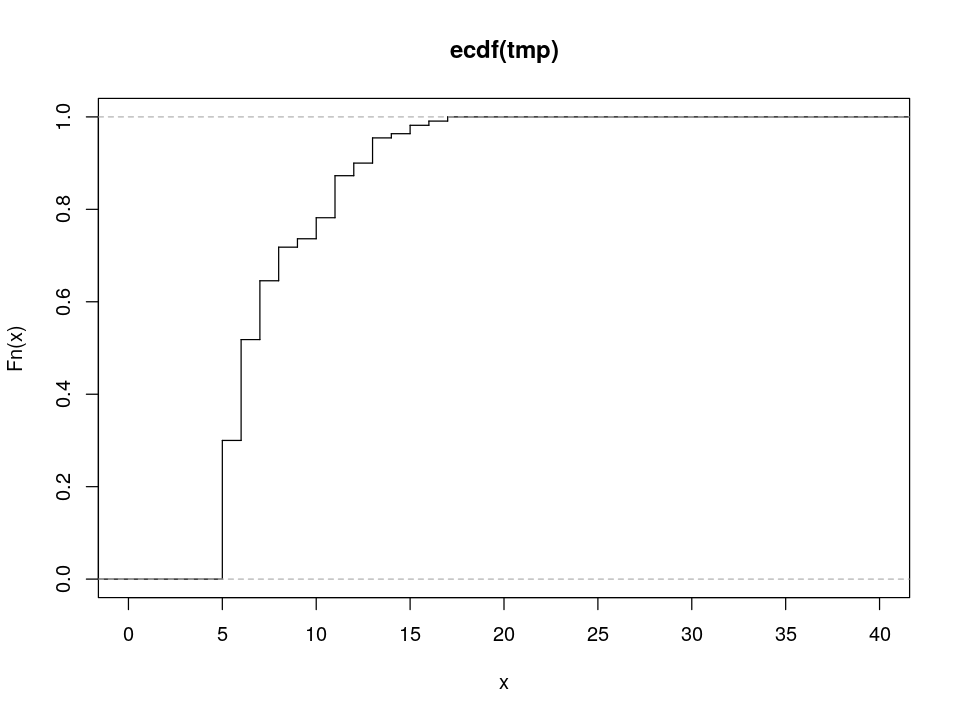

In [4]:
library(repr)
options(repr.plot.width = 8, repr.plot.height = 6)
tmp = floor(data$TotSpese[!is.na(data$TotSpese) & data$TotSpese>=5*10^5 & data$TotSpese<=2*10^6]/10^5)
cumulative = ecdf(tmp)
plot(cumulative, verticals=TRUE, do.points=FALSE, xaxt="n", xlim=c(0,40))
axis(1, at=seq(0,40,5), labels=seq(0,40,5))

4.2. specificate quale percentuale delle osservazioni visualizzate assume un valore compreso tra uno e due milioni di Euro.

In [5]:
print((cumulative(20)-cumulative(10))*100)

[1] 21.81818


5. Prendiamo in considerazione la quota di finanziamento erogata dalla Provincia.  
    5.1. Create una variabile (chiamatela progetti_a, per indicare i progetti di tipo A) che contenga la parte di dataset relativa ai progetti per i quali la quota provinciale di finanziamento è minore di quella regionale, e un’altra (chiamata progetti_b, per indicare i progetti di tipo B) che contenga la parte di dataset relativa ai progetti per i quali la quota provinciale di finanziamento è maggiore di quella regionale.

In [6]:
progetti_a = data[!is.na(data$FinProvincia) & !is.na(data$FinRegione) & data$FinProvincia < data$FinRegione,]
progetti_b = data[!is.na(data$FinProvincia) & !is.na(data$FinRegione) & data$FinProvincia > data$FinRegione,]

5.2. Quanti sono progetti di tipo A? Quanti sono progetti di tipo B?

In [7]:
nrow(progetti_a)
nrow(progetti_b)

[1] 368

[1] 175

6. Concentriamoci sui progetti di tipo A.  
    6.1. Selezionate i progetti di tipo A che hanno ricevuto un finanziamento provinciale compreso tra i 200 e i 1000 euro, estremo sinistro incluso, e salvate questa parte di dataset in una variabile chiamata selezione_progetti_a.

In [8]:
selezione_progetti_a = progetti_a[progetti_a$FinProvincia>=200 & progetti_a$FinProvincia<1000,]

6.2. Tracciate un istogramma del finanziamento provinciale di tali progetti, imponendo che le classi abbiano ampiezza 100 euro

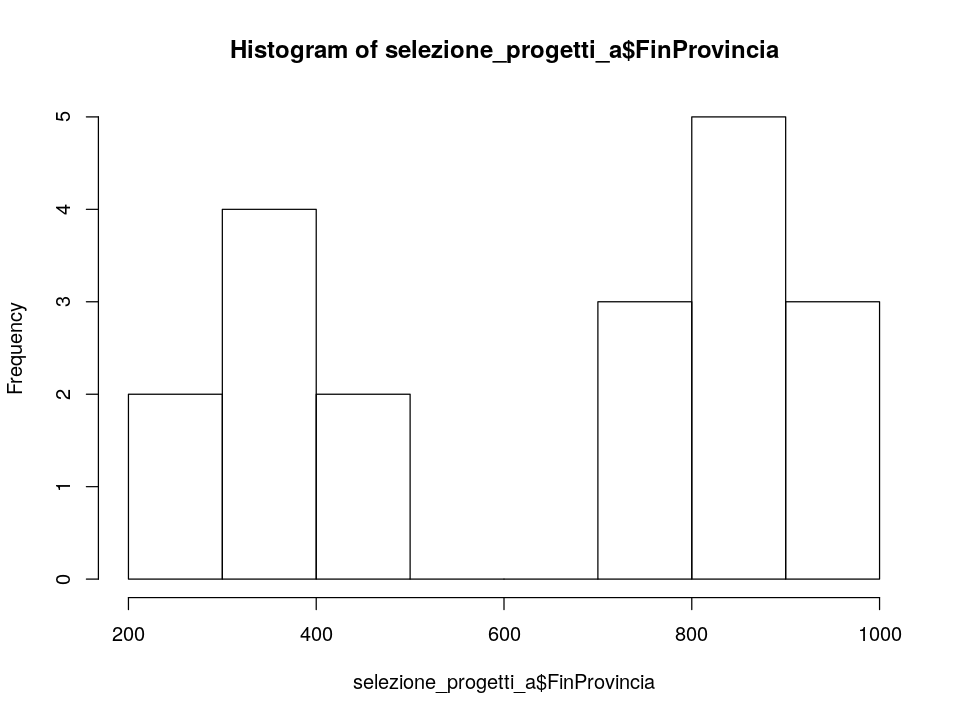

In [9]:
hist(selezione_progetti_a$FinProvincia, breaks=seq(200,1000,100))

6.3. Tracciate anche il boxplot per la medesima quantità.

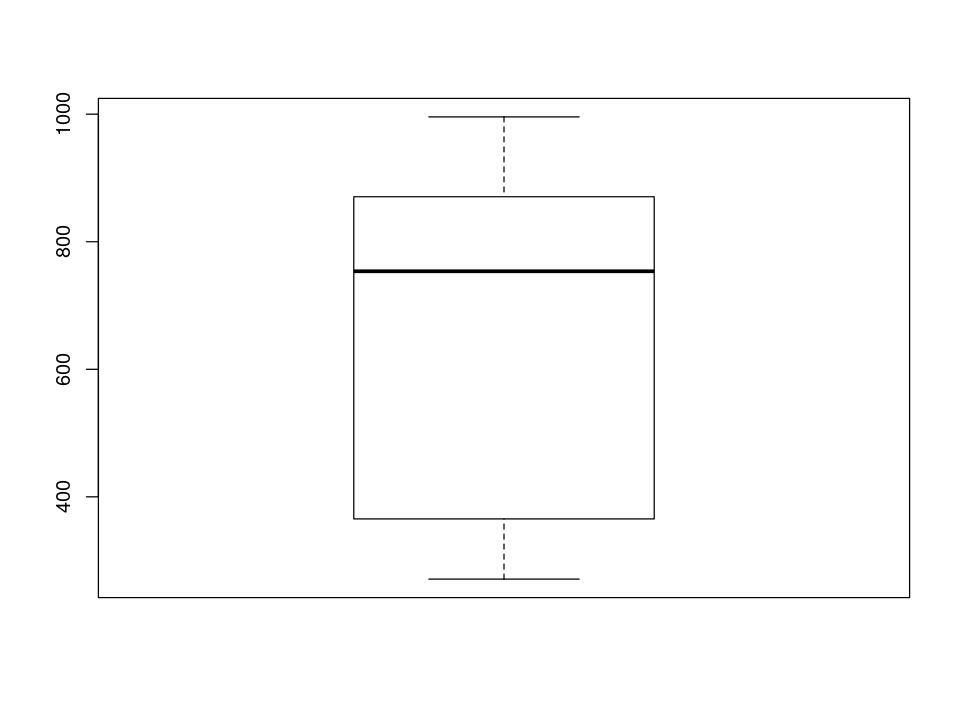

In [10]:
boxplot(selezione_progetti_a$FinProvincia)

6.4. Tra i due grafici appena prodotti, quale ritenete maggiormente informativo? Giusti-ficate la risposta.  

        Sicuramente l'istogramma in quanto riesce ad rappresentare meglio la distribuzione evidenziando la bimodalità.
6.5. Relativamente a tali progetti, qual è stato l’importo medio finanziato dalla provincia? Quale la deviazione standard?

In [11]:
print(mean(selezione_progetti_a$FinProvincia,na.rm=T))
print(sd(selezione_progetti_a$FinProvincia,na.rm=T))

[1] 636.9053
[1] 264.8023


6.6. Quanti hanno ricevuto un finanziamento provinciale compreso tra i 500 e i 700 euro?

In [12]:
nrow(selezione_progetti_a[selezione_progetti_a$FinProvincia >= 500 & selezione_progetti_a$FinProvincia <= 700,])
# oppure lo si può anche vedere dal rispettivo istogramma

[1] 0

6.7. Esiste una evidente relazione tra finanziamento provinciale e spese sostenute. Descrivete tale relazione nel modo più dettagliato possibile, utilizzando un indice numerico e un metodo grafico.

In [17]:
help(cor)

cor {stats},R Documentation
x,"a numeric vector, matrix or data frame."
y,"NULL (default) or a vector, matrix or data frame with compatible dimensions to x. The default is equivalent to y = x (but more efficient)."
na.rm,logical. Should missing values be removed?
use,"an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings ""everything"", ""all.obs"", ""complete.obs"", ""na.or.complete"", or ""pairwise.complete.obs""."
method,"a character string indicating which correlation coefficient (or covariance) is to be computed. One of ""pearson"" (default), ""kendall"", or ""spearman"": can be abbreviated."
V,"symmetric numeric matrix, usually positive definite such as a covariance matrix."


,FinProvincia,TotSpese
FinProvincia,1.0000000,0.6964012
TotSpese,0.6964012,1.0000000


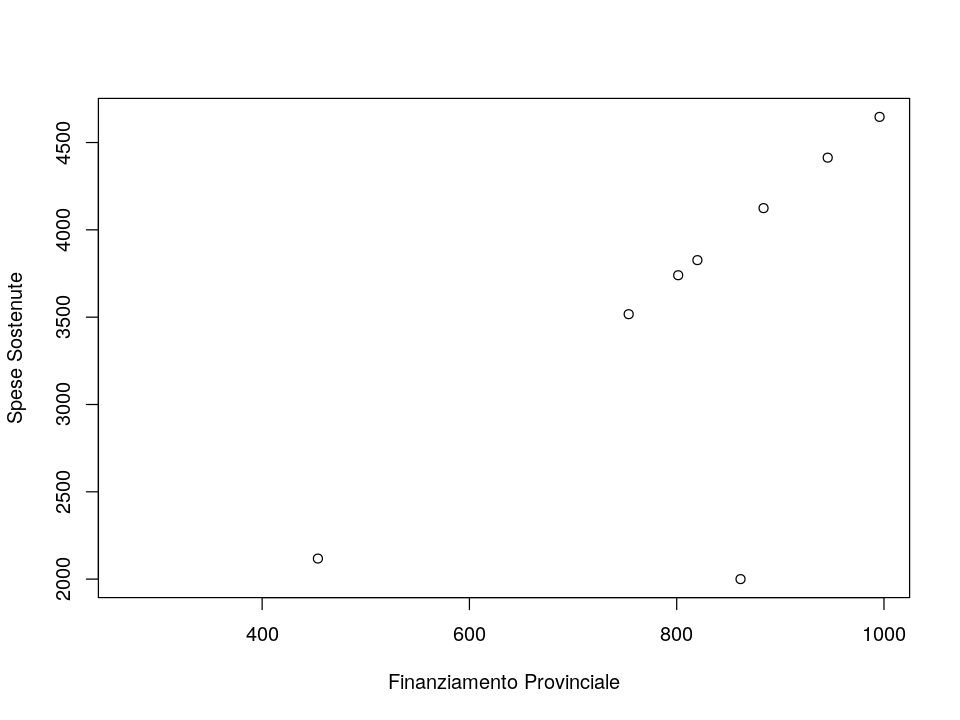

In [20]:
plot(selezione_progetti_a$FinProvincia, selezione_progetti_a$TotSpese, xlab="Finanziamento Provinciale", ylab="Spese Sostenute")
cor(selezione_progetti_a[!is.na(selezione_progetti_a$TotSpese),c("FinProvincia","TotSpese")],)

C'è una relazione lineare tra il finanziamento provinciale e le spese totali ad eccezione di un outlier che abbassa il coefficiente di correlazione.


6.8. Nella relazione avrete notato la presenza di almeno un progetto che si discosta note-volmente dall’andamento più generale. Eliminate tali progetti dall’insieme dei dati e rispondete nuovamente alle domande del punto precedente.  

        vediamo che l'outlier appare avere TotSpese 2000.0 eliminiamo dunque tutti i punti che hanno TotSpese inferiori a questa quantità.

In [ ]:
cor(selezione_progetti_a[!is.na(selezione_progetti_a$TotSpese) & selezione_progetti_a$TotSpese > 2000 ,c("FinProvincia","TotSpese")])

ora la relazione appare perfettamente lineare.

.7. Ritorniamo al dataset completo. Quanti sono i progetti che non hanno ancora sostenuto spese?

In [ ]:
nrow(data[is.na(data$TotSpese),])